In [348]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [349]:
def dilatacao(a, b):
    # Convertendo as entradas para binário (0 e 1)
    a = a.astype('uint8')
    b = b.astype('uint8')
    # Pegando as dimensões da imagem
    al, ac = a.shape
    bl, bc = b.shape

    # Adicionando padding para evitar erros de borda essa decisão foi tomada para que a função independa da
    # imagem original ter passado por padding
    a_ = (np.zeros((al+2, ac+2))).astype('uint8') # Cria uma matriz de zeros com uma borda maior
    a_[1:1+al, 1:1+ac] = a # Posiciona a matriz "a" no centro de "a_"
    ad = np.zeros_like(a, dtype='uint8') # Matriz de saída com o mesmo tamanho de "a"

    # Aplicando a dilatação
    for i in range(al):
        for j in range(ac):
            # Extraindo a região correspondente
            # Verificando se a região corresponde ao elemento estruturante
            if np.any(a_[i:i + bl, j:j + bc] & b): # Se alguma parte de "a" está contida em "b"
                ad[i, j] = 1                       # então iguala essa parte de "a" a 1

    return ad # Retorna uma imagem com as dimensões da imagem original, mas dilatada

In [350]:
def erosao(a, b):
    # Convertendo as entradas para binário (0 e 1)
    a = a.astype('uint8')
    b = b.astype('uint8')
    # Pegando as dimensões da imagem
    al, ac = a.shape
    bl, bc = b.shape

    # Adicionando padding para evitar erros de borda
    a_ = (np.zeros((al+2, ac+2))).astype('uint8') # Cria uma matriz de zeros com uma borda maior
    a_[1:1+al, 1:1+ac] = a # Posiciona a matriz "a" no centro de "a_"
    ae = np.zeros_like(a, dtype='uint8') # Matriz de saída com o mesmo tamanho de "a"

    # Aplicando a erosão
    for i in range(al):
        for j in range(ac):
            # Extraindo a região correspondente
            # Verificando se a região corresponde ao elemento estruturante
            if np.all((a_[i:i + bl, j:j + bc] & b) == b): # Se toda a parte de "a" está contida em "b" e for igual a "b"
                ae[i, j] = 1                              # então iguala essa parte de "a" a 1

    return ae # Retorna uma imagem com as dimensões da imagem original, mas dilatada

In [351]:
def hit_or_miss (a,x,w): # Função passada na aula para a aplicação do hit or miss
    p1 = erosao(a,x)
    p2 = erosao((1-a),w)
    return p1*p2

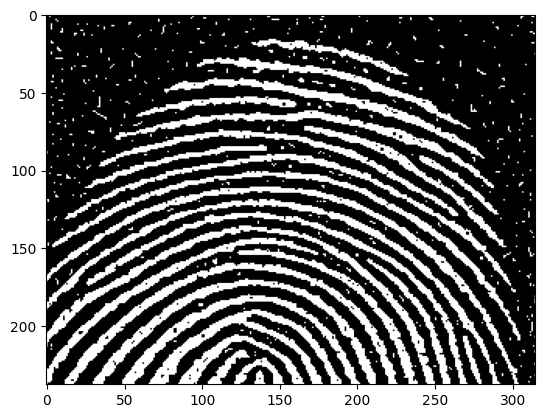

In [352]:
imagem = (io.imread('digital.png')).astype('uint8') # Lê a imagem e converte ela para 'uint8'
plt.imshow(imagem,cmap='gray') # Plota a imagem

img_ = (np.zeros((imagem.shape[0]+2, imagem.shape[1]+2))).astype('uint8') # Cria uma matriz de zeros com uma borda maior
img_[1:1+imagem.shape[0], 1:1+imagem.shape[1]] = imagem # Posiciona a matriz "imgagem" no centro de "img_"

img = img_

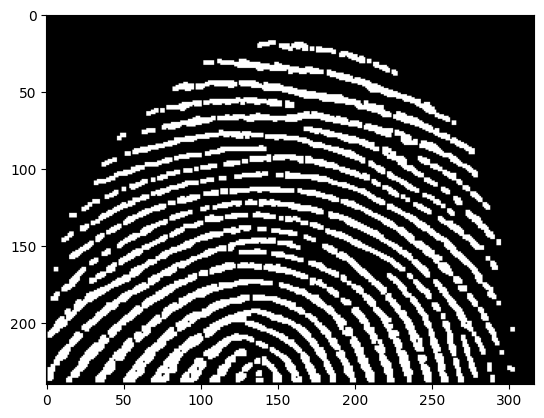

In [353]:
# Realiza a operação de abertura, essa função foi passada na aula
b = np.ones ((3,3)).astype('uint8')
img_op = dilatacao(erosao(img, b), b)
plt.imshow(img_op,cmap='gray') # Apresenta o resultado

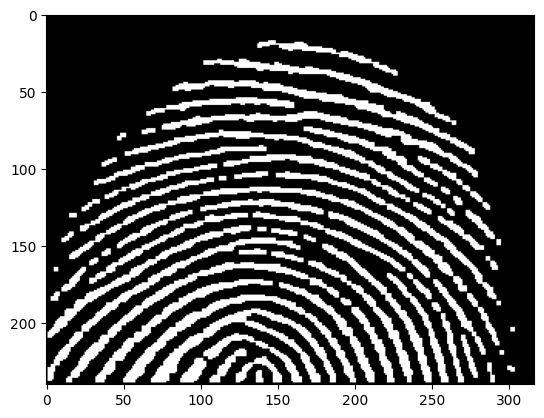

In [ ]:
# Realiza a operação de fechamento para fechar e lacunas buracos
b = np.ones ((3,3)).astype('uint8')
img_op = erosao(dilatacao(img_op, b), b)
plt.imshow(img_op,cmap='gray') # Apresenta o resultado

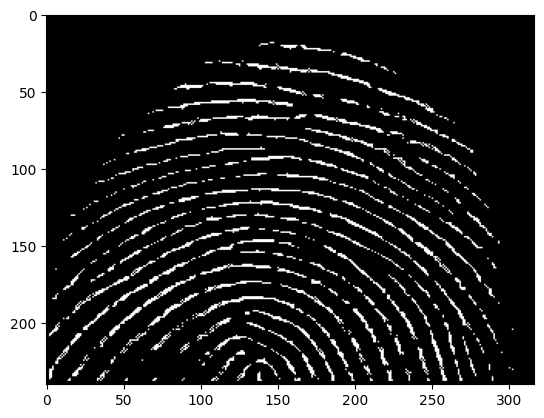

In [ ]:
# Definição dos padrões de remoção baseados na vizinhança, esqueletização
# Retirados na aula e no livro do Gonzalez
n = np.ones ((3,3)).astype('uint8') # Foi usado esse elemento estruturante, embora a aplicação do elemento em X forneça o mesmo resultado
# n = np.array([[1, 0, 1], # Elemento estruturante complementar da esqueletização, disponível em:
#               [0, 1, 0], # https://fenix.ciencias.ulisboa.pt/downloadFile/1688987299220445/pdi_t4%20-%20Morfologia%20Matematica%20binaria_pt.pdf
#               [1, 0, 1]])
# Realiza a operação como descrito no livro
er = erosao(img_op, n)
skt = er - dilatacao(erosao(er, n), n) # O elemento não é aumentado, pois causava problemas na função de erosao, um provavel erro de
# implementação, a lógica foi entendida, e está correta, entretanto não fomos capazes de aplicá-la em sua integralidade no python
plt.imshow(skt,cmap='gray')

# Abaixo o código com a tentativa falha de aplicar a esqueletização com o crescimento do elemento estruturante
# for i in range (10):
#     n_ = (np.ones((n.shape[0]+2, n.shape[1]+2))).astype('uint8') # Cria uma matriz de zeros com uma borda maior
#     n_[1:1+n.shape[0], 1:1+n.shape[1]] = n # Posiciona a matriz "a" no centro de "a_"
#     n = n_

#     img_op_ = (np.zeros((img_op.shape[0]+2, img_op.shape[1]+2))).astype('uint8') # Cria uma matriz de zeros com uma borda maior
#     img_op_[1:1+img_op.shape[0], 1:1+img_op.shape[1]] = img_op # Posiciona a matriz "a" no centro de "a_"

#     er = erosao(img_op_, n)
#     skt = er - dilatacao(erosao(er, n), n)

# plt.imshow(skt,cmap='gray')

In [357]:
# Implementação da poda:

# Definição dos padrões de remoção baseados na vizinhança
# Retirados na aula e no livro do Gonzalez

p1 = np.array([[0, 0, 0], # Elemento estruturante p1
               [1, 1, 0], 
               [0, 0, 0]])


p1c = np.array([[0, 1, 1], # Elemento estruturante complementar de p1
                [0, 0, 1], 
                [0, 1, 1]])

p2 = np.array([[0, 1, 0], # Elemento estruturante p2 
               [0, 1, 0], 
               [0, 0, 0]])

p2c = np.array([[0, 0, 0],  # Elemento estruturante complementar de p2 
                [1, 0, 1], 
                [1, 1, 1]])

p3 = np.array([[0, 0, 0], # Elemento estruturante p3 
               [0, 1, 1], 
               [0, 0, 0]])

p3c = np.array([[1, 1, 0],  # Elemento estruturante complementar de p3 
                [1, 0, 0],
                [1, 1, 0]])

p4 = np.array([[0, 0, 0], # Elemento estruturante p4 
               [0, 1, 0], 
               [0, 1, 0]])

p4c = np.array([[1, 1, 1],  # Elemento estruturante complementar de p4 
                [1, 0, 1],
                [0, 0, 0]])

p5 = np.array([[1, 0, 0], # Elemento estruturante p5  
               [0, 1, 0], 
               [0, 0, 0]])

p5c = 1 - p5               # Elemento estruturante complementar de p5

p6 = np.array([[0, 0, 1], # Elemento estruturante p6 
               [0, 1, 0], 
               [0, 0, 0]])

p6c = 1 - p6               # Elemento estruturante complementar de p6           

p7 = np.array([[0, 0, 0], # Elemento estruturante p7 
               [0, 1, 0], 
               [0, 0, 1]])

p7c = 1 - p7               # Elemento estruturante complementar de p7         

p8 = np.array([[0, 0, 0], # Elemento estruturante p8 
               [0, 1, 0], 
               [1, 0, 0]])

p8c = 1 - p8               # Elemento estruturante complementar de p8

# Conjunto de elementos estruturantes
p = [[p1, p1c], [p2, p2c], [p3, p3c], [p4, p4c],
     [p5, p5c], [p6, p6c], [p7, p7c], [p8, p8c]]

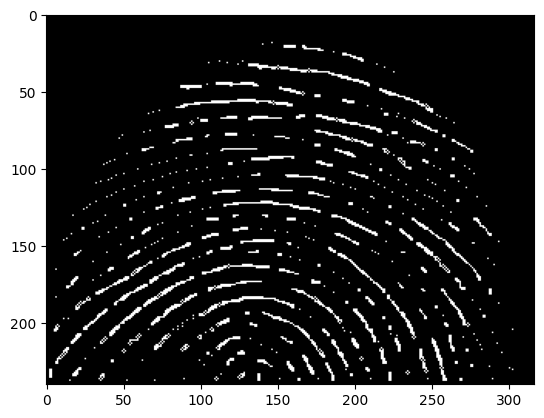

In [358]:
# Aplicação dos elementos estruturantes usando a operação de hit or miss
for i in range (5):
    for ee in p:
        skt = skt ^ hit_or_miss (skt,ee[0],ee[1])
plt.imshow(skt,cmap='gray') # Apresentação final do resultado da operação de poda sobre a imagem esqueletada